# Part 1: Catalog of binary mergers

In this first part of the tutorial we will walk through how to get information about the CBC detected up to date.

#### Acknowledgments: 
1) This tutorial was inspired by the Gravitational Wave Open Data Workshop 2018 organized by the LIGO Scientific Collaboration which was held on The California Institute of Technology (Caltech).

2) We will be using the PyCBC library [DOI: 10.5281/zenodo.1472015], which is a open library used to study GW strain data, find astrophysical sources generated by CBC, and study their parameters. Then, we will be using here some of the same tools that were used by the LIGO/Virgo scientific collaboration to find the GW events GW150914, GW151226, GW170104, GW170608, GW170814 and GW170817. 

3) Some reference papers are: *(i)* "The PyCBC search for gravitational waves from compact binary coalescence" arXiv:1508.02357; *(ii)* "PyCBC Inference: A Python-based parameter estimation toolkit for compact binary coalescence signals" arXiv:1807.10312.

4) This research has made use of data, software and/or web tools obtained from the Gravitational Wave Open Science Center (https://www.gw-openscience.org), a service of LIGO Laboratory, the LIGO Scientific Collaboration and the Virgo Collaboration. LIGO is funded by the U.S. National Science Foundation. Virgo is funded by the French Centre National de Recherche Scientifique (CNRS), the Italian Istituto Nazionale della Fisica Nucleare (INFN) and the Dutch Nikhef, with contributions by Polish and Hungarian institutes.

#### Aditional information:
1) For more information, please visit http://www.gravitationalwaves.mx

2) If you are interested in collaborations with us, please contact Dr. Claudia Moreno claudia.moreno@academico.udg.mx

3) We would like to thank the support of the National Council of Science and Technology of Mexico (CONACyT) through "Red Temática de Agujeros Negros y Ondas Gravitatorias" (http://www.redtematicaanyog.mx).

## 1.1 Binary mergers contained in the catalog

This will show the basics of the catalog of binary mergers detected by LIGO/Virgo up to date

### Get the names of the binary mergers contained in the catalog

Use the command catalog.Catalog to get the existing binary mergers

In [5]:
from pycbc import catalog

# Print the names of all events in the catalog
for merger_name in catalog.Catalog():
    print(merger_name)

LVT151012
GW170608
GW150914
GW170814
GW170817
GW170104
GW151226


Six or seven events? Please explain !

### Get the names of the events and the corresponding time of the mergers

Use the command catalog.Catalog to get the existing binary mergers

In [13]:
import pycbc.catalog

c = pycbc.catalog.Catalog()

# Names of mergers in the catalog
print(c.names)

# Approximate GPS time of the mergers
print([c[m].time for m in c])

['LVT151012', 'GW170608', 'GW150914', 'GW170814', 'GW170817', 'GW170104', 'GW151226']
[1128678900.44, 1180922494.49, 1126259462.4, 1186741861.53, 1187008882.43, 1167559936.6, 1135136350.65]


What is the GPS time?

### Get the parameters of the binary mergers contained in the catalog

It is possible to retrieve some of the basic parameters of each event from the catalog. Note that all parameters are given in the *source* frame. This means that they include the effect of redshift.

In [7]:
# Retrieve information from a specific GW event
eventname   = "GW150914"
event       = catalog.Merger(eventname)

mtotal      = event.mtotal
chripmass   = event.mchirp
redshift    = event.redshift

print(eventname)
print("   Total mass:   " + str(mtotal) + " solar masses")
print('   Chirp mass:   {} solar masses'.format(chripmass))
print('   Redshift:     {}'.format(redshift))


GW150914
   Total mass:   65.3 solar masses
   Chirp mass:   28.1 solar masses
   Redshift:     0.09


Compare the results with the seminal paper "Observation of Gravitational Waves from a Binary Black Hole Merger" https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102

In [8]:
# Retrieve information from all events in the catalog
mchirp = catalog.Catalog().median1d('mchirp')
print("The chirp mass for all existing events are " + str(mchirp))

The chirp mass for all existing events are [15.1    7.9   28.1   24.1    1.188 21.1    8.9  ]


### Transform mass parameters into the detector frame

By default the above interface returns parameters in the *source* frame. Due to cosmological redshift, gravitational-waves are stretched as they travel. This causes the observed waveform to be different in the detector frame. This corresponds to an observed change in the mass parameters (for example). However, the relationship is fairly straighforward.

In [9]:
# Retrieve information from a specific GW event
eventname   = "GW170817"
event       = catalog.Merger(eventname)
source_mtotal = event.median1d('mtotal')
redshift      = event.median1d('redshift')
det_mtotal    = source_mtotal * (1 + redshift)

print('Total Mass of ' + eventname)
print('   Source Frame:   {} solar masses'.format(source_mtotal))
print('   Detector Frame: {} solar masses'.format(det_mtotal))

Total Mass of GW170817
   Source Frame:   2.74 solar masses
   Detector Frame: 2.76192 solar masses


## 1.2 Accessing data around each event

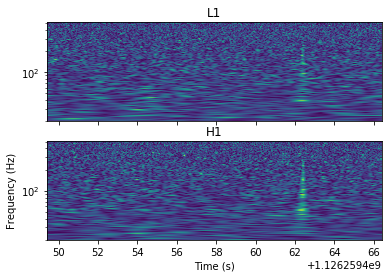

In [12]:
import pycbc.catalog, pylab

m = pycbc.catalog.Merger("GW150914") # GW170817

fig, axs = pylab.subplots(2, 1, sharex=True, sharey=True)
for ifo, ax in zip(["L1", "H1"], axs):
    pylab.sca(ax)
    pylab.title(ifo)
    # Retreive data around the BNS merger
    ts = m.strain(ifo).time_slice(m.time - 15, m.time + 6)

    # Whiten the data with a 4s filter
    white = ts.whiten(4, 4)

    times, freqs, power = white.qtransform(.01, logfsteps=200,
                                        qrange=(110, 110),
                                        frange=(20, 512))
    pylab.pcolormesh(times, freqs, power**0.5, vmax=5)

pylab.yscale('log')
pylab.ylabel("Frequency (Hz)")
pylab.xlabel("Time (s)")
pylab.show()

## 1.3 Activity

Find more parameters contained in the object

Hint: use this command "print event.data['median1d'].keys()" to get existing parameters

Also try this command and get conlcusions: "event.time"

Compare the retrieved information with the event characteristics published in the papers